In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as sns
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
days = pd.read_csv('rentals_7_rolling.csv', sep=',')

In [4]:
print(days.info())
days.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            22 non-null     int64  
 1   weekly              22 non-null     object 
 2   weekly_avg_rentals  22 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 656.0+ bytes
None


,store_id,weekly,weekly_avg_rentals
0,1,2005-05-23T00:00:00.000Z,68.67
1,2,2005-05-23T00:00:00.000Z,70.50
2,2,2005-05-30T00:00:00.000Z,79.00
3,1,2005-05-30T00:00:00.000Z,81.50
4,2,2005-06-13T00:00:00.000Z,147.17


In [5]:
days['dates'] = pd.to_datetime(days['weekly'], format="%Y/%m/%d")
print(days.info())
days.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   store_id            22 non-null     int64              
 1   weekly              22 non-null     object             
 2   weekly_avg_rentals  22 non-null     float64            
 3   dates               22 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 832.0+ bytes
None


,store_id,weekly,weekly_avg_rentals,dates
0,1,2005-05-23T00:00:00.000Z,68.67,2005-05-23 00:00:00+00:00
1,2,2005-05-23T00:00:00.000Z,70.50,2005-05-23 00:00:00+00:00
2,2,2005-05-30T00:00:00.000Z,79.00,2005-05-30 00:00:00+00:00
3,1,2005-05-30T00:00:00.000Z,81.50,2005-05-30 00:00:00+00:00
4,2,2005-06-13T00:00:00.000Z,147.17,2005-06-13 00:00:00+00:00


In [6]:
days = days.drop('weekly', axis=1)
days.head()

,store_id,weekly_avg_rentals,dates
0,1,68.67,2005-05-23 00:00:00+00:00
1,2,70.50,2005-05-23 00:00:00+00:00
2,2,79.00,2005-05-30 00:00:00+00:00
3,1,81.50,2005-05-30 00:00:00+00:00
4,2,147.17,2005-06-13 00:00:00+00:00


In [21]:
by_store = days.groupby('store_id')
rental_mean = by_store['weekly_avg_rentals'].agg(np.mean)
rental_mean_err = by_store['weekly_avg_rentals'].agg(stats.sem)

In [9]:
bydate_stores = days.groupby(['store_id','dates'])
bydates_mean = bydate_stores['weekly_avg_rentals'].agg(np.mean)
bydates_sem = bydate_stores['weekly_avg_rentals'].agg(stats.sem)
print(bydates_mean)

store_id  dates                    
1         2005-05-23 00:00:00+00:00     68.67
          2005-05-30 00:00:00+00:00     81.50
          2005-06-13 00:00:00+00:00    137.00
          2005-06-20 00:00:00+00:00    149.50
          2005-07-04 00:00:00+00:00    202.67
          2005-07-11 00:00:00+00:00    245.00
          2005-07-25 00:00:00+00:00    271.33
          2005-08-01 00:00:00+00:00    318.00
          2005-08-15 00:00:00+00:00    258.67
          2005-08-22 00:00:00+00:00    306.50
          2006-02-13 00:00:00+00:00     92.00
2         2005-05-23 00:00:00+00:00     70.50
          2005-05-30 00:00:00+00:00     79.00
          2005-06-13 00:00:00+00:00    147.17
          2005-06-20 00:00:00+00:00    153.50
          2005-07-04 00:00:00+00:00    213.50
          2005-07-11 00:00:00+00:00    233.00
          2005-07-25 00:00:00+00:00    271.33
          2005-08-01 00:00:00+00:00    339.00
          2005-08-15 00:00:00+00:00    266.00
          2005-08-22 00:00:00+00:00    305.5

In [10]:
unstacked_bydates_mean = bydates_mean.unstack(level=0)
unstacked_bydates_mean

store_id,1,2
dates,,
2005-05-23 00:00:00+00:00,68.67,70.50
2005-05-30 00:00:00+00:00,81.50,79.00
2005-06-13 00:00:00+00:00,137.00,147.17
2005-06-20 00:00:00+00:00,149.50,153.50
2005-07-04 00:00:00+00:00,202.67,213.50
2005-07-11 00:00:00+00:00,245.00,233.00
2005-07-25 00:00:00+00:00,271.33,271.33
2005-08-01 00:00:00+00:00,318.00,339.00
2005-08-15 00:00:00+00:00,258.67,266.00


In [11]:
unstacked_bydates_sem = bydates_sem.unstack(level=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11870de10>,
      dtype=object)

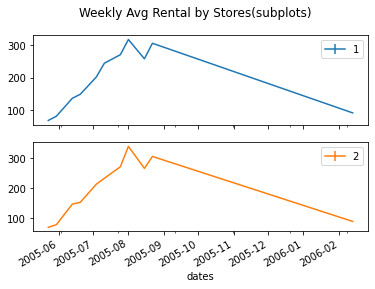

In [40]:
unstacked_bydates_mean.plot(yerr=unstacked_bydates_sem, title='Weekly Avg Rental by Stores(subplots)', subplots=True)

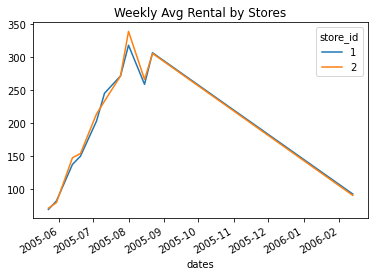

In [39]:
unstacked_bydates_mean.plot(yerr=unstacked_bydates_sem, title='Weekly Avg Rental by Stores')

# Popular genres by stores

In [42]:
st1_genres = pd.read_csv('st1_genres.csv', sep=',')
st2_genres = pd.read_csv('st2_genres.csv', sep=',')


In [43]:
st1_genres

,store1_genre,rented_count_st1
0,Action,596
1,Drama,576
2,Animation,568
3,Family,557
4,Sports,555
5,Foreign,524
6,Sci-Fi,521
7,Comedy,502
8,New,502
9,Games,455


In [44]:
st2_genres

,store2_genre,rented_count_st2
0,Sports,624
1,Documentary,600
2,Animation,598
3,Sci-Fi,580
4,Family,539
5,Action,516
6,Games,514
7,Foreign,509
8,Classics,492
9,Children,492


##### Filter only top 10 genres in both stores

In [46]:
st1_top10 = st1_genres[:10]
st1_top10

,store1_genre,rented_count_st1
0,Action,596
1,Drama,576
2,Animation,568
3,Family,557
4,Sports,555
5,Foreign,524
6,Sci-Fi,521
7,Comedy,502
8,New,502
9,Games,455


In [47]:
st2_top10 = st2_genres[:10]
st2_top10

,store2_genre,rented_count_st2
0,Sports,624
1,Documentary,600
2,Animation,598
3,Sci-Fi,580
4,Family,539
5,Action,516
6,Games,514
7,Foreign,509
8,Classics,492
9,Children,492


##### histogram of genre counts for both stores

Text(0.5, 0, 'Genres')

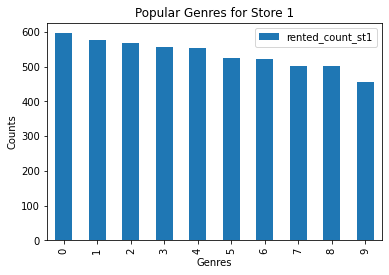

In [51]:
st1_top10.plot(kind='bar', title="Popular Genres for Store 1")
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Genres")

Text(0.5, 0, 'Genres')

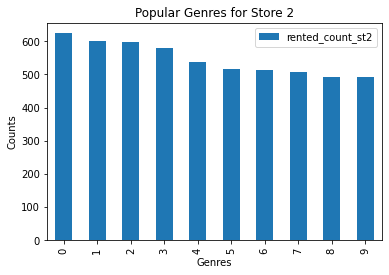

In [49]:
st2_top10.plot(kind='bar', title="Popular Genres for Store 2")
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Genres")

              rented_count_st1
store1_genre                  
Action                     596
Drama                      576
Animation                  568
Family                     557
Sports                     555
Foreign                    524
Sci-Fi                     521
Comedy                     502
New                        502
Games                      455
              rented_count_st2
store2_genre                  
Sports                     624
Documentary                600
Animation                  598
Sci-Fi                     580
Family                     539
Action                     516
Games                      514
Foreign                    509
Classics                   492
Children                   492


Text(0.5, 0, 'Genres')

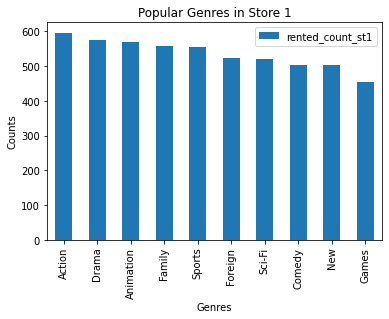

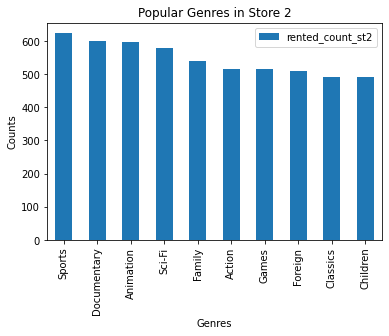

In [55]:
# modify both df to group by genre names to show name in the x-axis
st1_bygenre = st1_top10.set_index('store1_genre')
st2_bygenre = st2_top10.set_index('store2_genre')
print(st1_bygenre)
print(st2_bygenre)

st1_bygenre.plot(kind='bar', title='Popular Genres in Store 1')
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Genres")

st2_bygenre.plot(kind='bar', title='Popular Genres in Store 2')
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Genres")